<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:** The biological unit that allows and uses electrochemical signals to pass information from one part of a system to another (or in the bio case, brain). Has things called dendrites that connect to axon terminals via axons surrounded by myelin sheathes, inside the cell body next to the dendrites is the nucleus which determines whether or not to pass a signal. Remove all the bio stuff and you got the computer stuff ayo

- **Input Layer:** Nodes (visible) which consist of received data from a dataset (or whatever input medium we want to use).

- **Hidden Layer:** Nodes which are 'invisible' to us. They receive input from input node, or another hidden node's output among maybe more exotic cases. They typically help increase the accuracy of the model by allowing the neural network to adapt to more non-linear problems.

- **Output Layer:** Three forms of an output layer: Regression, Binary, Multiclass. All have a special activation function, sometimes called an transfer, to determine if the output should be passed along to affect the outcome or not.

- **Activation:** An activation function, or transfer function, can update weights using back propogation to create a better outcome. An activation function at its core is typically the same throughout all layers of the NN. It determines how much signal to 'transfer' to the next layer...doesn't seem to be a 1 or 0 type of situation strictly but instead a _long_ number between two values, ala tan, relu, etc.

- **Backpropagation:** when you take the derivatives of the activation functions and somehow use that to influence the weight so that the errors in the model can be minimized. So, it basically 'trains' our model for us.


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

candy = pd.read_csv('chocolate_gummy_bears.csv')

In [10]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. Explain why you could not achieve a higher accuracy with a *simple perceptron*. It's possible to achieve ~95% accuracy on this dataset.

In [64]:
# Start your candy perceptron here

X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values
X_tr = X[0:7500]
y_tr = y[0:7500]
X_tst = X[7500:10000]
y_tst = y[7500:10000]

In [12]:
# Perceptron
# TEACHER class
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

In [44]:
pn = Perceptron(0.05, 5)

In [45]:
pn.fit(X_tr, y_tr)

In [46]:
pred = pn.predict(X_tst)

In [47]:
accuracy_score(pred, y_tst)

0.5048

HIghest score w/ single layer is 50.48% it's probably XOR that's why.

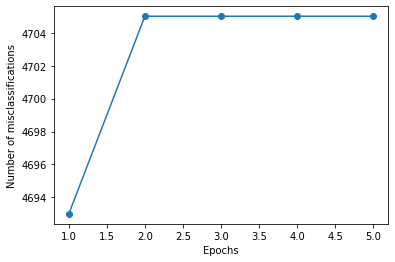

In [48]:
# TEACHER graph
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [83]:
# Teacher's function
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 2
        self.hiddenNodes = 10
        self.outputNodes = 7500

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        # Arrows in first section
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        # Arrows in second section
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
    
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        # sigmoid derivative function
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        # Bias term is not here cause who cares lol
        return self.activated_output
    
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        # Vector of errors
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [84]:
nn = NeuralNetwork()

In [85]:
print(f'''
L1|Wgt: \n{nn.weights1}
L2|Wgt: \n{nn.weights2}
''')


L1|Wgt: 
[[0.47618984 0.21057162 0.26250326 0.74532633 0.49027424 0.77817953
  0.94107578 0.08053633 0.07007087 0.08939121]
 [0.78572494 0.41812127 0.29058567 0.11690336 0.77262832 0.34304247
  0.76056249 0.45170151 0.04291249 0.73172205]]
L2|Wgt: 
[[4.12997515e-01 1.42580545e-01 1.47544230e-01 ... 9.15930307e-01
  7.11220351e-01 6.37944479e-01]
 [3.86448556e-01 4.75286473e-01 9.97615565e-01 ... 3.86462878e-01
  4.28835637e-01 4.25883477e-01]
 [4.42261443e-01 3.10102043e-01 3.91913335e-01 ... 4.99355805e-01
  9.40307683e-01 5.25292667e-01]
 ...
 [7.67150610e-01 7.19217072e-01 7.52876707e-02 ... 9.90980078e-01
  3.03538652e-01 6.33753760e-01]
 [9.08864611e-01 5.20246660e-01 1.89146661e-04 ... 5.65393614e-02
  3.90890984e-01 1.13200522e-01]
 [4.99215246e-01 5.79640983e-01 2.15267258e-01 ... 1.84370131e-01
  7.88135642e-01 7.66290874e-02]]



In [86]:
X_tr.shape, y_tr.shape

((7500, 2), (7500,))

In [87]:
output = nn.feed_forward(X_tr)
print(f'''
IN: \n{candy.values}
OT: \n{output}
''')


IN: 
[[0 1 1]
 [1 0 1]
 [0 1 1]
 ...
 [0 1 1]
 [0 1 1]
 [1 0 1]]
OT: 
[[0.96932843 0.95980153 0.9192316  ... 0.95850409 0.94682412 0.9467478 ]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]
 [0.96932843 0.95980153 0.9192316  ... 0.95850409 0.94682412 0.9467478 ]
 ...
 [0.98075077 0.97330078 0.94447797 ... 0.97307485 0.96069395 0.9653896 ]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]]



In [88]:
# Teacher's loop
for i in range(10000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        nice = nn.feed_forward(X_tr)
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X_tr)
        print('Actual Output: \n', y_tr)
        print('Predicted Output: \n', str(nice))
        print("Loss: \n", str(np.mean(np.square(y_tr - nn.feed_forward(X_tr)))))
    nn.train(X_tr,y_tr)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.96932843 0.95980153 0.9192316  ... 0.95850409 0.94682412 0.9467478 ]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]
 [0.96932843 0.95980153 0.9192316  ... 0.95850409 0.94682412 0.9467478 ]
 ...
 [0.98075077 0.97330078 0.94447797 ... 0.97307485 0.96069395 0.9653896 ]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]
 [0.9681264  0.9551512  0.91866282 ... 0.95437672 0.93616931 0.94489696]]
Loss: 
 0.4492034582068617
+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [1 1]
 [1 0]
 [1 0]]
Actual Output: 
 [1 1 1 ... 0 1 1]
Predicted Output: 
 [[0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]
Loss: 
 0.18666666726381229
+---------EPOCH 3---------+
I

KeyboardInterrupt: 

In [89]:
nice = nn.feed_forward(X_tst)
print('Input: \n', X_tst)
print('Predicted Output: \n', str(nice))

Input: 
 [[0 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]
Predicted Output: 
 [[1.  1.  1.  ... 0.  1.  1. ]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0.5]]


P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2,1
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [121]:
def cleanup(df):
    
    # Make all yes and no binary questions 1 and 0
    
    dfx = df
    # Establish target
    dfy = dfx['target']
    dfx.drop(['target'],axis='columns')

    return np.array(dfx), np.array(dfy)

In [122]:
X, y = cleanup(df)

In [123]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

enc = OrdinalEncoder()
scl = MinMaxScaler()

X_e = enc.fit_transform(X, y)
X_s = scl.fit_transform(X_e, y)

In [124]:
from sklearn.model_selection import train_test_split
t_size = .45
rand_s = 444
X_train, X_test, y_train, y_test = train_test_split(
    X_s, y, test_size=t_size, random_state=rand_s
)

In [125]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((166, 14), (166,), (137, 14), (137,))

In [126]:
from sklearn.model_selection import GridSearchCV

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [127]:
from sklearn.model_selection import StratifiedKFold

In [128]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="ghsts-r-dangerous")

W&B Run: https://app.wandb.ai/jasonnova/ghsts-r-dangerous/runs/djydgwgq

In [129]:
# Hyperparams
inputs = X.shape[1]
epochs = 25
b_size = 250

# Create model
def c_m():
    
    model = Sequential()
    model.add(Dense(96, input_shape=(inputs,), activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.15))
    model.add(Dense(96, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=c_m, verbose=0)

param_grid = {'batch_size': [94,95,96,97],
              'epochs':[6,7,8,9,10]}
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=0)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
# Teacher's
# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.9819277054574116 using {'batch_size': 97, 'epochs': 9}
Means: 0.9277108501957123, Stdev: 0.07709918194130565 with: {'batch_size': 94, 'epochs': 6}
Means: 0.8795180841382727, Stdev: 0.10747119545558685 with: {'batch_size': 94, 'epochs': 7}
Means: 0.96385542455926, Stdev: 0.025175363467456507 with: {'batch_size': 94, 'epochs': 8}
Means: 0.9457831447383007, Stdev: 0.06465227879890036 with: {'batch_size': 94, 'epochs': 9}
Means: 0.9638554306633501, Stdev: 0.02960280779074456 with: {'batch_size': 94, 'epochs': 10}
Means: 0.8915662668555616, Stdev: 0.09280393197919042 with: {'batch_size': 95, 'epochs': 6}
Means: 0.951807235378817, Stdev: 0.06846395526292863 with: {'batch_size': 95, 'epochs': 7}
Means: 0.9457831221172609, Stdev: 0.03936071524834895 with: {'batch_size': 95, 'epochs': 8}
Means: 0.9156626484480249, Stdev: 0.06095029039828642 with: {'batch_size': 95, 'epochs': 9}
Means: 0.8975903603685907, Stdev: 0.08190434776343473 with: {'batch_size': 95, 'epochs': 10}
Means: 0.78313253

In [131]:
wandb.config.epochs = 7
wandb.config.batch_size = 95
model.fit(
    X_train, y_train, 
    validation_split=0.45,
    batch_size=wandb.config.batch_size,
    epochs=wandb.config.epochs,
    callbacks=[WandbCallback()]) 

In [132]:
# Fit model
wade = model.fit(X_train, y_train,
          batch_size=97,
          epochs=10,
          verbose=True)

Train on 166 samples
Epoch 1/10
166/166 [==============================] - 1s 5ms/sample - loss: 0.6893 - accuracy: 0.5361
Epoch 2/10
166/166 [==============================] - 0s 56us/sample - loss: 0.6806 - accuracy: 0.7470
Epoch 3/10
166/166 [==============================] - 0s 59us/sample - loss: 0.6660 - accuracy: 0.8795
Epoch 4/10
166/166 [==============================] - 0s 63us/sample - loss: 0.6483 - accuracy: 0.8855
Epoch 5/10
166/166 [==============================] - 0s 53us/sample - loss: 0.6263 - accuracy: 0.9337
Epoch 6/10
166/166 [==============================] - 0s 57us/sample - loss: 0.5840 - accuracy: 0.9096
Epoch 7/10
166/166 [==============================] - 0s 62us/sample - loss: 0.5455 - accuracy: 0.9398
Epoch 8/10
166/166 [==============================] - 0s 58us/sample - loss: 0.4876 - accuracy: 0.9398
Epoch 9/10
166/166 [==============================] - 0s 51us/sample - loss: 0.4281 - accuracy: 0.9578
Epoch 10/10
166/166 [==============================] 

In [133]:
from sklearn.metrics import accuracy_score
# expecto prediction
pred = model.predict(X_test)
accuracy_score(pred, y_test)

0.9927007299270073

- Can't tell if I did something wrong here to get 99% (my previous score not shown)? I mean...talk about obvious overfitting if not outright wrong, lol

- If I make the training data only 25% of the total data and try to predict the other 75%, it gives an accuracy of 71%...which seems reasonable.